count_tweets() function takes the list of tweets and labels as input, cleans all tweets using process_tweet() function and returns a dictionary that storing tuple of stemmed word and its label(0,1) as key and the number of times this word appears as value.

In [1]:
def count_tweets(result, tweets, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''

    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word,y)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    return result

process_tweet() is a helper function for preprocessing the dataset that tokenizes the text into separate words, converts words to stems, lowercase all letters and removes stop words and punctuations.

In [2]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    # preserve_case = False for lowercasing all letters
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

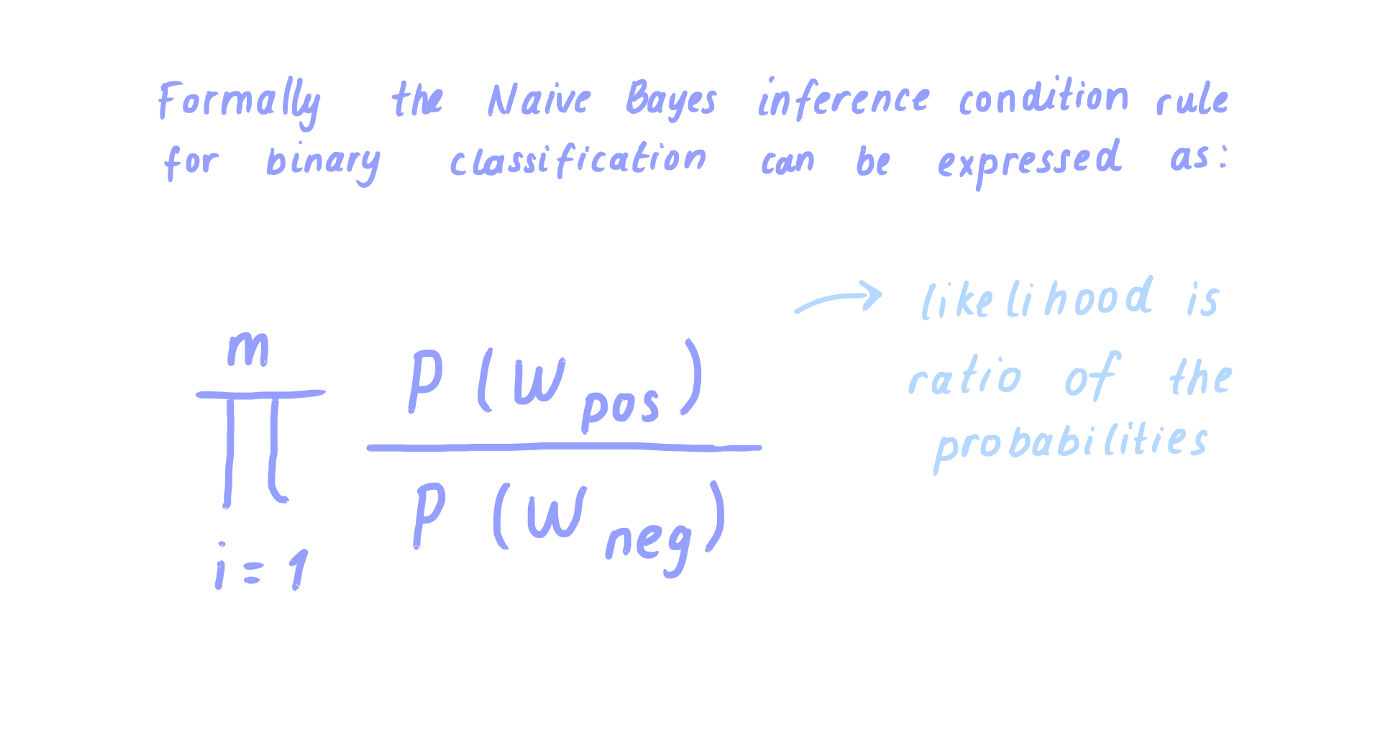

In [7]:
from IPython.display import Image
Image("nb.png", width=500)

2. Train a model using Naive Bayes: 
Naive Bayes is a supervised machine learning algorithm, and it relies on word frequency counts like logistic regression. Before implementing the Naive Bayes algorithm there are 2 important terms that we need to understand, these are log likelihood and log prior.

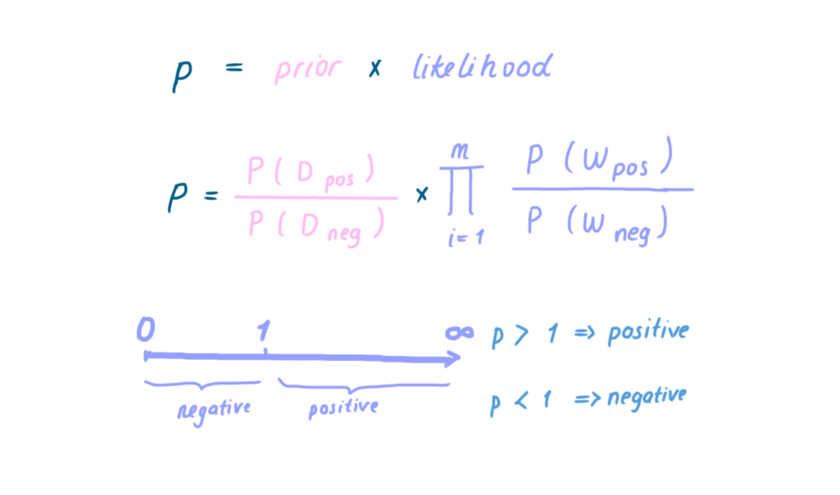

In [8]:
from IPython.display import Image
Image("likelihood.png", width=500)

Likelihood is the product of ratios of positive probability to negative probability for each word in the tweet. When likelihood value is higher than 1, we can predict this tweet as positive so that the words in the tweet collectively correspond positive sentiment.